In [1]:
import pandas as pd
import warnings 
import numpy as np

warnings.filterwarnings('ignore')

df = pd.read_csv('../price.csv',index_col=['stock_id','date'],parse_dates=['date'])
df = df.rename(columns={
    '開盤價':'open',
    '最高價':'high',
    '最低價':'low',
    '收盤價':'close',
    '成交金額':'volume'
})
df = df[['open','high','low','close','volume']]
df = df.loc[df['volume']>0]
df = df.apply(pd.to_numeric,errors='coerce')
df = df.loc['2330']
df

,open,high,low,close,volume
date,,,,,
2007-01-02,67.8,68.0,67.3,67.7,1768131919
2007-01-03,67.8,68.7,67.5,68.0,2875024398
2007-01-04,67.7,68.1,67.6,67.7,1514454033
2007-01-05,67.5,67.7,66.5,66.9,2048997239
2007-01-08,66.1,66.5,65.7,65.8,1595029837
...,...,...,...,...,...
2022-06-28,496.0,500.0,496.0,497.5,8392290378
2022-06-29,496.0,498.5,491.0,491.0,16352376816
2022-06-30,484.5,486.5,476.0,476.0,23900613642


In [2]:
condition = (df['close'].shift(2)-df['open'].shift(2)<0) & (df['close'].shift(1)-df['open'].shift(1)<0) & (df['close']-df['open']<0)
condition

date
2007-01-02    False
2007-01-03    False
2007-01-04    False
2007-01-05    False
2007-01-08    False
              ...  
2022-06-28    False
2022-06-29    False
2022-06-30    False
2022-07-01     True
2022-07-04     True
Length: 3819, dtype: bool

<Axes: xlabel='date'>

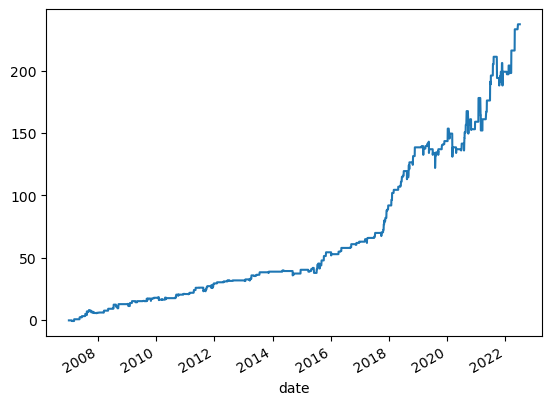

In [3]:
df['earn'] = 0
# df['open'].shift(-1) 明天開盤價、df['open'].shift(-2)後天 > 明天開盤買進後天賣出
df.loc[condition, 'earn'] = df['open'].shift(-2)-df['open'].shift(-1)
df['earn'].cumsum().plot()

In [4]:
# pip install pyfolio-reloaded
import pyfolio as pf

Start date,2007-01-02
End date,2022-07-04
Total months,181
,Backtest
Annual return,8.547%
Cumulative returns,246.557%
Annual volatility,7.14%
Sharpe ratio,1.18
Calmar ratio,1.03
Stability,0.98
Max drawdown,-8.258%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,8.26,2019-05-16,2019-08-02,2020-01-07,169
1,6.95,2020-01-20,2020-03-06,2020-08-31,161
2,4.95,2008-08-14,2008-09-02,2008-09-15,23
3,4.39,2011-08-15,2011-08-17,2011-09-26,31
4,4.08,2009-01-15,2009-01-17,2009-02-05,16


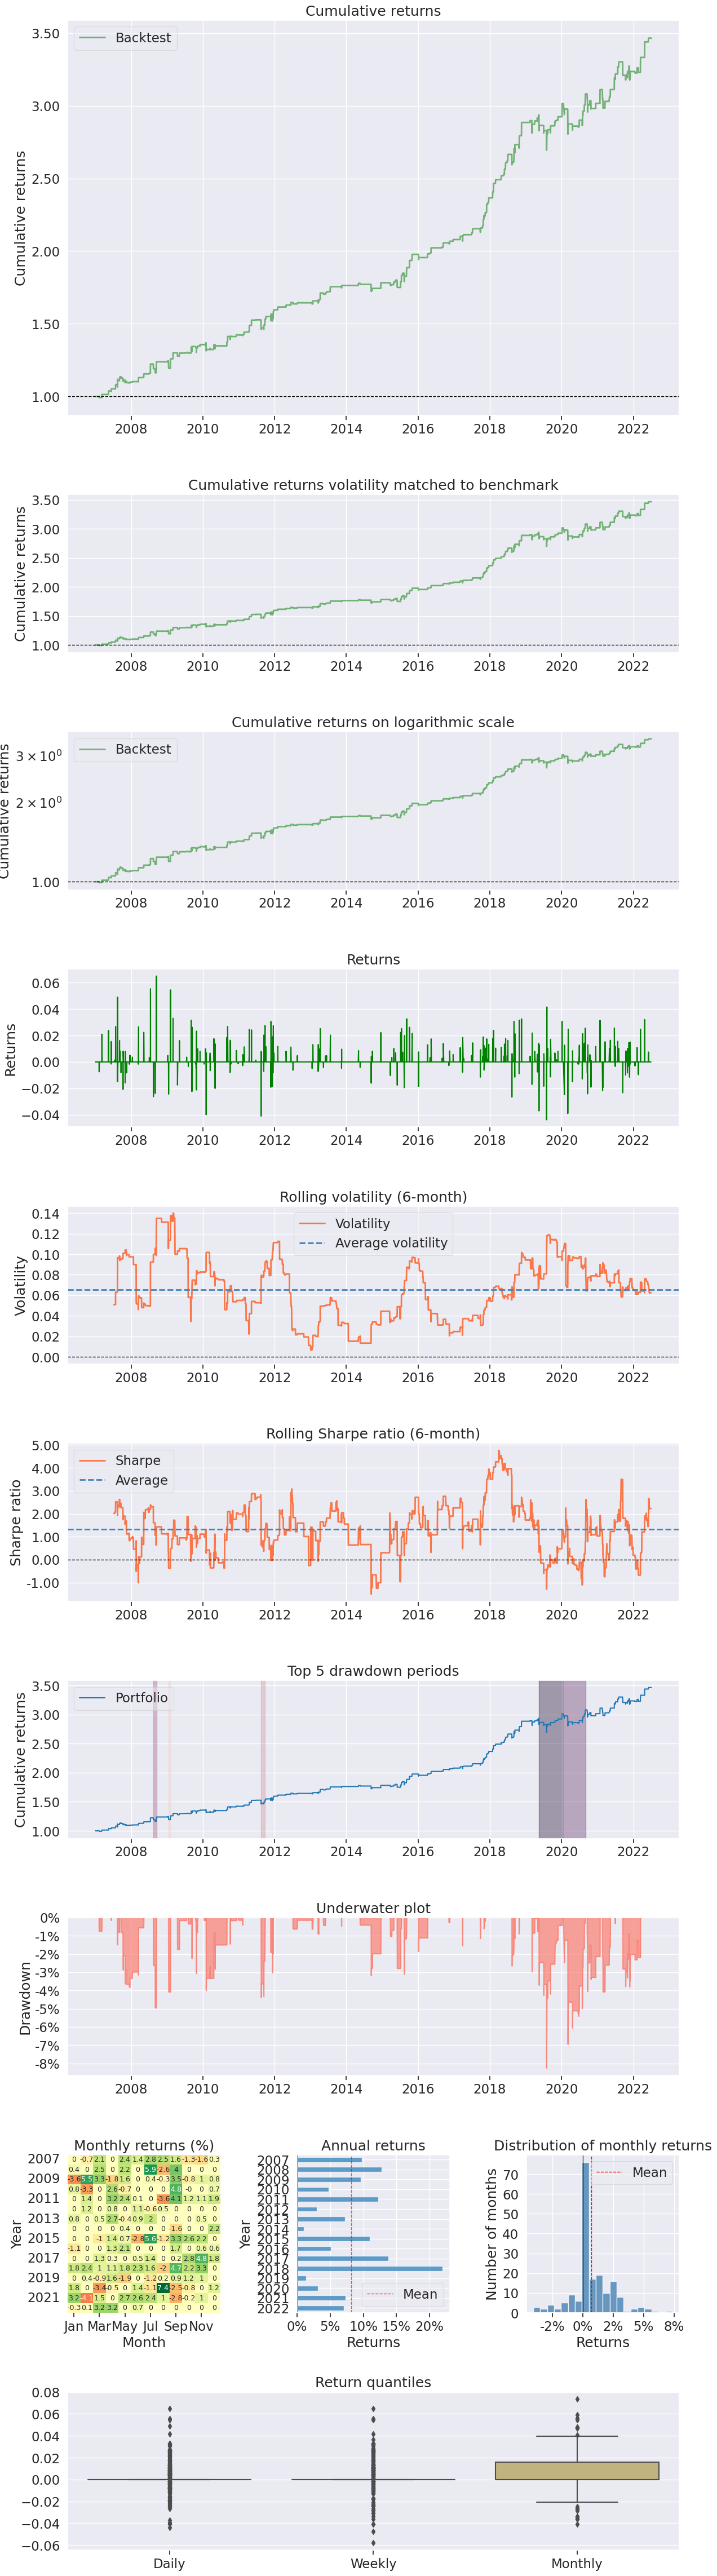

In [5]:
pf.create_returns_tear_sheet(df['earn']/df['open'].shift(-1))

# Annual return	年報酬
# Cumulative returns累積報酬率
# Sharpe ratio	最有價值的欄位  評斷策略好不好的最關鍵指標 大於1很好大於1.5超級好 小於0.5就不要用了